<Body>   
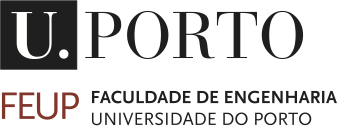   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **M. Rosário Pinho** (mrpinho@fe.up.pt)



FEUP, Fev. 2024

---


# **Notebook #05:  Stability of Nonautonomous Systems and convergence to limit cycles**

#1 - Nonautonomous Systems

Consider the following nonautonomous system with a limit cycle:

$
\dot x = -x - e^{-2t} y
$

$
\dot y= x - y
$







##1.1
Simulate this system.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


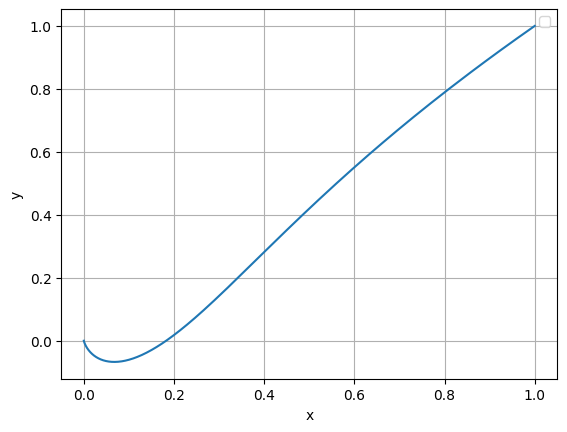

In [37]:
#to complete
import numpy as np
from scipy.integrate import odeint


def system(z, t):
  x, y = z[0], z[1]
  dxdt = - x - np.exp(-2*t) *y
  dydt = - x - y
  return [dxdt, dydt]


t = np.linspace(0, 10, 1000)
z0 = [1, 1]

sol = odeint(system, z0, t)
x, y = sol[:, 0], sol[:, 1]

#plot
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='best')
plt.show()



##1.2
To show that the origin is GUAS, we can use a Lyapunov theory for nonautonomous systems. Consider the function

$
V(t,x,y)=x^2 + (1+e^{-2t}) y^2.
$

Plot the functions $t \to V(t,x(t),y(t))$ and $t \to \dot V(t,x(t),y(t))$) for the trajectories already computed.


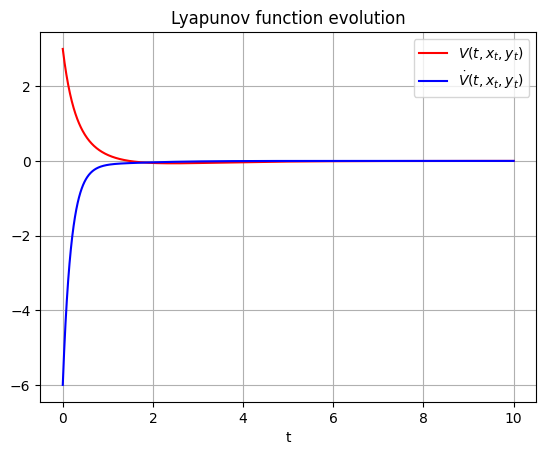

In [38]:
# to complete

def fV(t,x,y):
  return x*x + (1 + np.exp(-2*t)) * y


def dV(t,x,y):
  return - 2 * ( x*x - x*y + y*y * (1 + 2 *np.exp(-2*t)))

fV_t=fV(t,x,y)
dV_t=dV(t,x,y)

plt.plot(t, fV_t, 'r-', label='$V(t,x_t,y_t)$')
plt.plot(t, dV_t, 'b-', label='$\dot V(t,x_t,y_t)$')
plt.xlabel('t')
plt.title('Lyapunov function evolution')
plt.grid()
plt.legend(loc='best')
plt.show()


##1.3
What can you say about the stability of this system?


#2- Satellite in planar orbit: convergence to a circular orbit





The equations of motion of a satellite in a planar orbit about a point mass M are:


\begin{align*}
{\ddot{r}}  &= r \dot \theta^2 - \frac{\mu}{r^2}+ T \sin \phi \\
{\ddot{\theta}} &= - \frac{2 \dot r \dot \theta}{r}+\frac{T}{r}cos \phi
\end{align*}


where:

r= radial distance from mass M \\
$\theta$ = angle from a fixed reference point in the orbit \\
$\mu$= GM, the gravitational constant of the attracting mass M \\
and the control inputs are:
T= thrust
$\phi$ = thrust angle.


Take the state as $x=[ r \; \dot r \;  \theta \; \dot  \theta ]^T $,and the control input vector as $u=[ \phi \; T]^T $.



## **Activity 1**

##2.1
Write the system in state space form

##2.2
One solution of the satellite equations is a circular orbit, which has values of:
$
r=r_0, \dot r=0, \dot \theta =w, T=0$ and $ \mu = r_0^3 w^2$(this is Kepler's third
law).
The constant angular velocity is equal to $w$, and the constant radius of the circular orbit is $r_0$. Assume that the thrust angle is  90 degrees  at nominal.


Simulate the nominal trajectory $x_0$ and small perturbations around it.




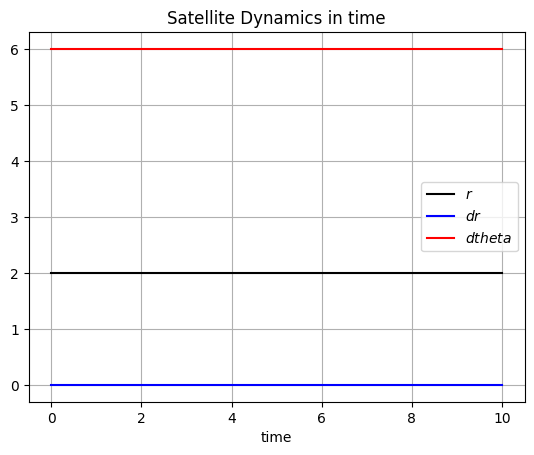

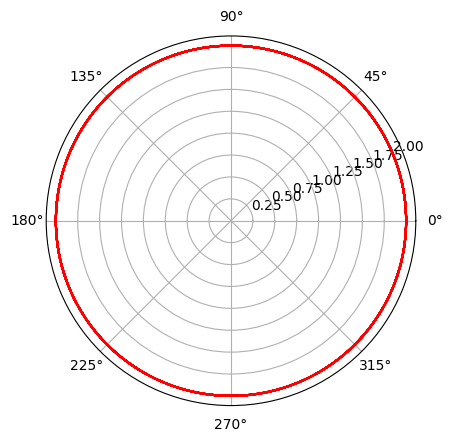

In [39]:
# To complete


import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
r0=2
w=6
mu=(r0**3) * (w**2)

# vector field
def Sys_f(x, t=0):
  r=x[0]
  dr=x[1]
  th=x[2]
  dth=x[3]
  dx1= dr
  dx2= r*dth*dth - mu/(r*r)
  dx3= dth
  dx4= -2 * dr * dth/r
  return np.array([ dx1, dx2, dx3, dx4
                   ])

# generate 1000 linearly spaced points for t
t_end=10
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([r0, 0.0, 0, w])
#x0 = np.array([r0+0.2, 0.0, 0, w])

#  integrate.odeint
x = integrate.odeint(Sys_f, x0, t, full_output=False)

x1,x2, x3, x4 = x.T

#plot

plt.figure(1)
plt.plot(t, x1, 'k-', label='$r$')
plt.plot(t, x2, 'b-', label='$dr$')
#plt.plot(t, x3*360/6.28, 'g-', label='$theta$')
plt.plot(t, x4, 'r-', label='$d theta$')
plt.title("Satellite Dynamics in time")
plt.xlabel("time")
plt.grid()
plt.legend(loc='best')

plt.figure(2)
# setting the axes projection as polar
plt.axes(projection = 'polar')
plt.polar(x3, x1, 'r-')


##2.3
Consider the dynamics of the error to the nominal trajectory $x_0$, that is $ y= x-x_0$

Linearize the system. Notice that although $x_0$ is time-varying, the linearized error dynamics is autonomous. Why?

##2.4
 Simulate the linearized system. Compare the original nonlinear systems with the linearization plus the nominal system.

In [40]:
# To complete


import numpy as np
#import control

r0 = 10
omega= 1
A = np.array([\
            [ 0.0, 1.0, 0.0, 0.0],\
            [3*omega**2, 0.0, 0.0, 2*r0*omega],\
            [0.0, 0.0, 0.0, 1],\
            [0.0, -2*omega/r0, 0.0, 0.0] ] )

B = np.array([\
            [0.0, 0.0],\
            [0.0, 1.0],\
            [0.0, 0.0],\
            [0.0, 0.0] ] )


print ('A\n', A)
print ('B\n', B)

eig_open_loop, eig_vect = np.linalg.eig( A )
print ('Eigenvalues of A \n', eig_open_loop)

A
 [[ 0.   1.   0.   0. ]
 [ 3.   0.   0.  20. ]
 [ 0.   0.   0.   1. ]
 [ 0.  -0.2  0.   0. ]]
B
 [[0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]
Eigenvalues of A 
 [0.+0.j 0.+1.j 0.-1.j 0.+0.j]


##2.5
Where are the open-loop poles of the linearized system. Is it controllable?

Consider its subsystem $ \dot z= \bar A z + \bar B v$ with $z=[r \; \dot r]$ and $v=T$. Check that the subsystem is controllable. Find a linear feedback  matrix $K$ such that $v=-Kz$ places the poles at -1 and -2.



In [41]:
pip install control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
# To complete
import control

# Controllability
print ('---Controllability')
print ('rank of ctrb(A,b)' , np.linalg.matrix_rank( control.ctrb( A, B ) ))
print ('Eigenvalues of A ', np.linalg.eig( A )[0])


#Sun-system
r0 = 2
omega= 6
A1 = np.array([\
            [0.0, 1.0],\
            [3*omega**2, 0.0] ] )

B1 = np.array([\
            [0.0],\
            [1.0] ] )

print ('A1\n', A1)
print ('B1\n', B1)

eig_open_loop, eig_vect = np.linalg.eig( A1 )
print ('Eigenvalues of A1 \n', eig_open_loop)

# Pole Placement
K = control.place( A1, B1, [-1, -2] )
print ('---Pole Placement\nK=\n', K)

# Verification of Eigen values of A-BK
print ('\n---Verification of Eigenvalues of A-BK\n')
Acl = A1-B1@K
#print(Acl)
eig_Acl, eig_vect = np.linalg.eig( Acl )
print ('Eigenvalues of A-BK:', eig_Acl)

---Controllability
rank of ctrb(A,b) 3
Eigenvalues of A  [0.+0.j 0.+1.j 0.-1.j 0.+0.j]
A1
 [[  0.   1.]
 [108.   0.]]
B1
 [[0.]
 [1.]]
Eigenvalues of A1 
 [ 10.39230485 -10.39230485]
---Pole Placement
K=
 [[110.   3.]]

---Verification of Eigenvalues of A-BK

Eigenvalues of A-BK: [-1. -2.]


##2.6
 Simulate the complete  system with the designed controller. Start from initial points outside the nominal trajectory.

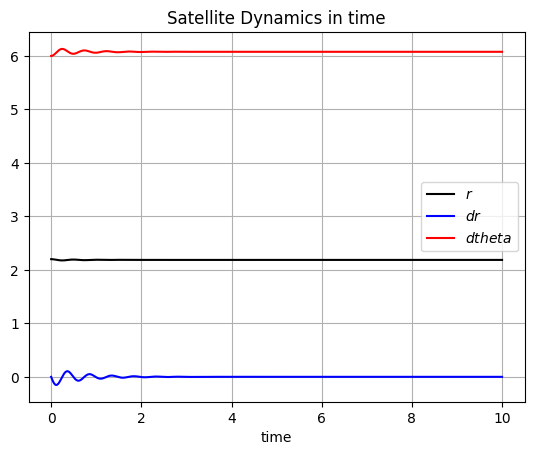

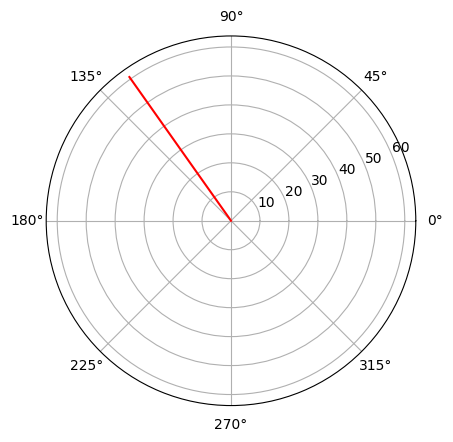

In [43]:
# To complete


import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
r0=2
w=6
mu=(r0**3) * (w**2)

def Sys_f(x, t=0):
  r=x[0]
  dr=x[1]
  th=x[2]
  dth=x[3]
  T = -K[0][0]*(r-r0)-K[0][1]*dr
  dx1=dr
  dx2= r * (dth*dth)  - mu/(r*r)+T
  dx3=dth
  dx4=  - 2 * dr * dth /r
  return np.array([ dx1, dx2, dx3, dx4
                   ])

# generate 1000 linearly spaced points for t
t_end=10
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([r0+0.2, 0.0, 0, w])

#  integrate.odeint
x = integrate.odeint(Sys_f, x0, t, full_output=False)

x1,x2, x3, x4 = x.T

#plot

plt.figure(1)
plt.plot(t, x1, 'k-', label='$r$')
plt.plot(t, x2, 'b-', label='$dr$')
#plt.plot(t, x3*360/6.28, 'g-', label='$theta$')
plt.plot(t, x4, 'r-', label='$d theta$')
plt.title("Satellite Dynamics in time")
plt.xlabel("time")
plt.grid()
plt.legend(loc='best')

plt.figure(2)
# setting the axes projection as polar
plt.axes(projection = 'polar')
plt.polar(x1, x3, 'r-')


##2.7
Consider the function $V(x)=r^2 -r \dot r + \frac{1}{2} \dot r^2 $. Use it to show that the linear subsystem is G.A.S.

What can you conclude about the stability of the complete linearized system using V? What can you conclude about the original nonlinear system?